In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [9]:
from sklearn.datasets import load_digits
data = load_digits()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and 'pixel_column' is the name of the pixel column
scaler = MinMaxScaler(feature_range=(0, 1))

for i in df.columns[:-1]:
  df[i] = scaler.fit_transform(df[[i]])


In [11]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0,0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0,1
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0,2
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0,3
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0,4


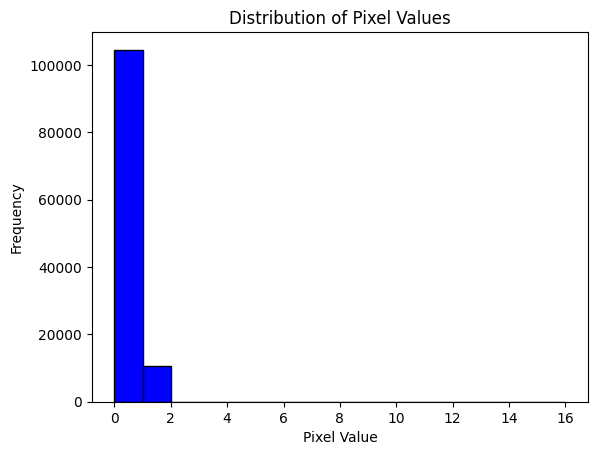

In [12]:
import matplotlib.pyplot as plt

# Flatten the DataFrame except the last column and plot the histogram
pixel_values = df.iloc[:, :-1].values.flatten()
plt.hist(pixel_values, bins=16, range=(0, 16), color='blue', edgecolor='black')
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


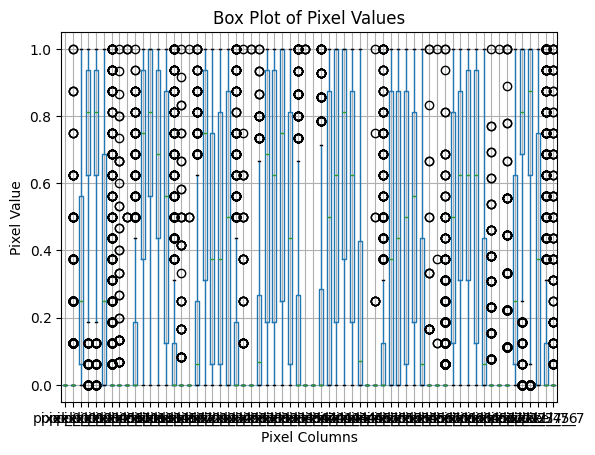

In [13]:
import matplotlib.pyplot as plt

# Box plot for all pixel columns except the last one
df.iloc[:, :-1].boxplot()
plt.title('Box Plot of Pixel Values')
plt.xlabel('Pixel Columns')
plt.ylabel('Pixel Value')
plt.show()


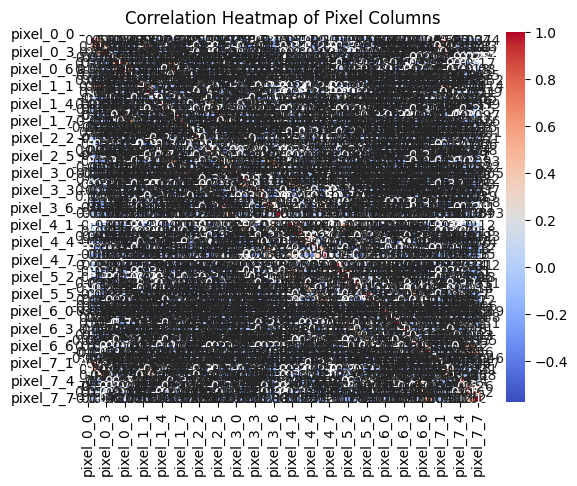

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for pixel columns
correlation_matrix = df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pixel Columns')
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

In [21]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [22]:
rbf_model.fit(X_train, y_train)


SVC()

In [23]:
rbf_model.score(X_test,y_test)


0.9833333333333333

In [24]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [25]:
linear_model.score(X_test,y_test)


0.9777777777777777

In [30]:
from sklearn.model_selection import GridSearchCV


# Set up the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],       # Different values for C
    'gamma': [1e-3, 1e-4, 1e-5]   # Different values for gamma
}

# Create an SVM with RBF kernel
svc = SVC(kernel='rbf')

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Use the best parameters to fit the final model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# # Predict using the best model
# predictions = best_model.predict(X_scaled)

# # If you want to evaluate your model, you can calculate accuracy or other metrics here
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y, predictions)
# print(f"Training accuracy: {accuracy}")

Best parameters found: {'C': 100, 'gamma': 0.001}
Best cross-validation accuracy: 0.9800923290963132


SVC(C=100, gamma=0.001)

In [31]:
df.columns.shape

(65,)

In [46]:
y_train.shape

(1257,)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical




y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the neural network model
model = Sequential() 
model.add(Dense(128, activation='relu' , input_shape =((64 , ))))   # First hidden layer
model.add(Dropout(0.2))                    # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))    # Second hidden layer
model.add(Dense(10, activation='softmax')) # Output layer with softmax activation


c:\Users\yethu\Desktop\repos\DeepLearning_Projects\HandWritten_Digits_classification\d_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
y_train.shape

(1257, 10)

In [49]:

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])




In [36]:
X_train.shape

(1257, 64)

In [50]:


# Train the model

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, 
                    batch_size=32)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.2261 - loss: 2.2293 - val_accuracy: 0.7741 - val_loss: 1.5403
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7132 - loss: 1.3815 - val_accuracy: 0.8981 - val_loss: 0.6488
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8593 - loss: 0.6425 - val_accuracy: 0.9333 - val_loss: 0.3265
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9126 - loss: 0.3815 - val_accuracy: 0.9481 - val_loss: 0.2278
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9262 - loss: 0.3025 - val_accuracy: 0.9593 - val_loss: 0.1879
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9434 - loss: 0.2259 - val_accuracy: 0.9648 - val_loss: 0.1587
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9398 - loss: 0.2084 - val_accuracy: 0.9704 - val_loss: 0.1351
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9614 - loss: 0.1686 - val_accuracy: 0.9778 - val_l

In [51]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0781  
Test accuracy: 0.9815


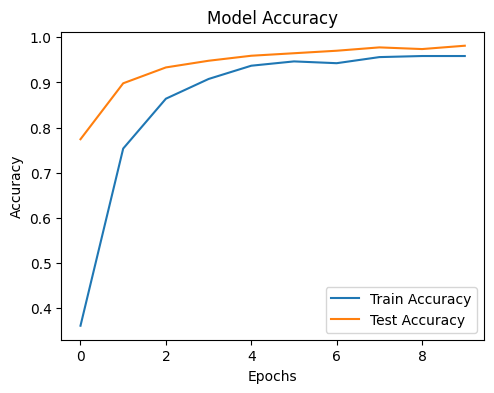

In [52]:

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


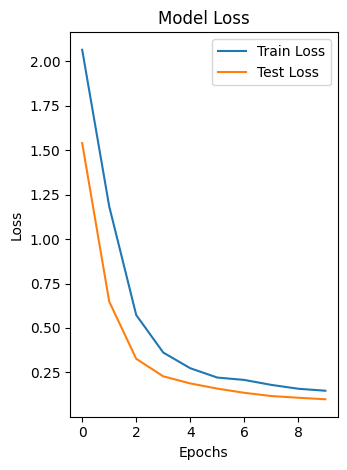

In [53]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
